# HR Analytics Project- Understanding the Attrition in HR

### Project Description

Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?

### HR Analytics

Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.

### Attrition in HR
Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.

How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question, we will write the code and try to understand the process step by step.

### Attrition affecting Companies

A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.


### Dataset Link-
•	https://github.com/dsrscientist/IBM_HR_Attrition_Rate_Analytics


In [ ]:
## importing data from github and converting zip file into csv

In [1]:
# import requests
# import zipfile
# import pandas as pd
# import os

# # Define the GitHub URL of the ZIP file you want to read
# github_url = 'https://github.com/dsrscientist/IBM_HR_Attrition_Rate_Analytics/raw/master/ibm-hr-analytics-employee-attrition-performance.zip'

# # Download the ZIP file
# response = requests.get(github_url)

# # Check if the request was successful
# if response.status_code == 200:
#     # Save the content of the ZIP file
#     with open('temp.zip', 'wb') as f:
#         f.write(response.content)

#     # Extract the ZIP file
#     with zipfile.ZipFile('temp.zip', 'r') as zip_ref:
#         zip_ref.extractall('extracted_folder')
        
#     print('ZIP file extracted successfully!')
# else:
#     print('Failed to download ZIP file from GitHub.')

# # List all the files inside the extracted folder
# extracted_files = os.listdir('extracted_folder')

# # Loop through each file and read it into a pandas DataFrame
# for file in extracted_files:
#     if file.endswith('.csv'):
#         csv_path = os.path.join('extracted_folder', file)
#         df = pd.read_csv(csv_path)

#         # Save the DataFrame to a new CSV file 
#         new_csv_filename = file.replace('.csv', '_processed.csv')
#         df.to_csv(new_csv_filename, index=False)

# print('CSV files read and converted successfully!')


### Importing Necessary Libraries

In [131]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import power_transform
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score,roc_curve,plot_roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import joblib

### Load Dataset

In [3]:
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [4]:
df.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


## EDA(Exploratory Data Analysis)

In [5]:
#checking the shape of dataset
print("There are {} rows and {} columns respectively present in the dataset.".format(*df.shape))

There are 1470 rows and 35 columns respectively present in the dataset.


In [6]:
# checking columns in Dataset
print("these are the columns present in the dataset:  \n\n",df.columns)

these are the columns present in the dataset:  

 Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')


In [7]:
# checking duplicate values in the dataset
print("There are {} duplicates present in the dataset".format(df.duplicated().sum()))

There are 0 duplicates present in the dataset


In [8]:
# checking duplicate values in the dataset
print("There are {} Nulls present in the dataset".format(df.isnull().sum().sum()))

There are 0 Nulls present in the dataset


<AxesSubplot:>

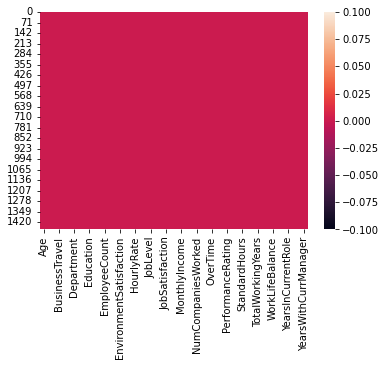

In [9]:
# Heatmap of null values
sns.heatmap(df.isnull())

In [10]:
# checking information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

Observation:
- No Missing Data
- dtypes: int64(26), object(9)

### Statistical Analysis

In [11]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


One very important observation that can be made from the provided data is that the "EmployeeCount" column has a constant value of 1. This means that all the records in the dataset have the same value for this feature, and it doesn't provide any meaningful information for analysis. As a result, this column can be safely removed from the dataset as it won't contribute to any insights or patterns.

Additionally, it is noticed that some of the columns like "StandardHours" have a constant value of 80. This means that this feature also does not vary across the dataset and contains no useful information for analysis. Hence, it can also be removed from the dataset.

also there is a column EmployeeNumber which is unique for every feature, This will not contributue to pridict Attrition, we can drop this as well 

In [12]:
df.drop(columns=['EmployeeCount','StandardHours','EmployeeNumber'],axis=1, inplace=True)

In [13]:
df.head(2)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7


## Taking insigts by Visualizing Data

### Age vs Attrition ( Attrition means leaving company )

In [14]:
df['Age'].unique()


array([41, 49, 37, 33, 27, 32, 59, 30, 38, 36, 35, 29, 31, 34, 28, 22, 53,
       24, 21, 42, 44, 46, 39, 43, 50, 26, 48, 55, 45, 56, 23, 51, 40, 54,
       58, 20, 25, 19, 57, 52, 47, 18, 60], dtype=int64)

<AxesSubplot:xlabel='Age', ylabel='Count'>

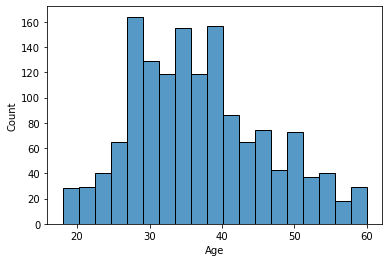

In [15]:
sns.histplot(df['Age'])

<AxesSubplot:xlabel='Attrition', ylabel='Age'>

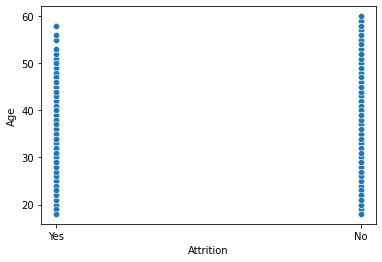

In [16]:
sns.scatterplot(x='Attrition',y='Age', data=df)

Observation:

Resignation happens ate every age

<AxesSubplot:xlabel='Age', ylabel='Attrition'>

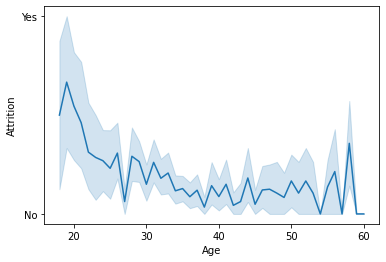

In [17]:
sns.lineplot(x='Age',y='Attrition',data=df)

During early age after 18, job change/job attrition is very frequient  and after 57 age is very frequesntjob attrition, may be because of health condition or because of retire

### This is binary classification problem, lets distribute target variable

<AxesSubplot:xlabel='Attrition', ylabel='count'>

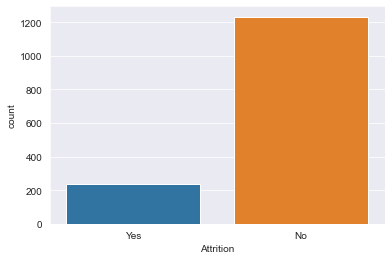

In [18]:
sns.set_style('darkgrid')
sns.countplot(x='Attrition', data=df)

In [19]:
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

Data Is Imbalanced

([<matplotlib.patches.Wedge at 0x263081d49d0>,
 [Text(-1.0930587195656423, 0.606401381579494, 'No'),
  Text(0.961891673217765, -0.5336332157899547, 'Yes')],
 [Text(-0.6558352317393852, 0.3638408289476963, '83.88%'),
  Text(0.5246681853915082, -0.2910726631581571, '16.12%')])

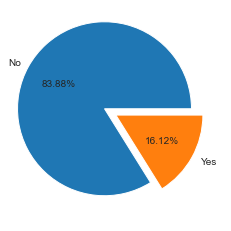

In [20]:
plt.pie(df['Attrition'].value_counts().values,labels=df['Attrition'].value_counts().index,autopct='%1.2f%%',explode=(.15,0))

16.12% employees have left the job

### Business Travel vs Attririon

In [21]:
df['BusinessTravel'].value_counts()

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

In [22]:
df['BusinessTravel'].unique()

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

<AxesSubplot:xlabel='Attrition', ylabel='BusinessTravel'>

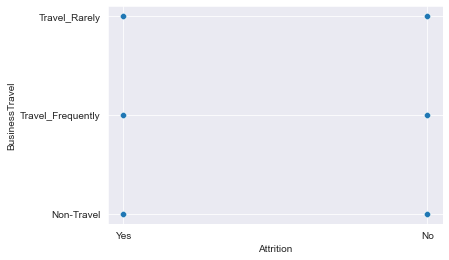

In [23]:
sns.scatterplot('Attrition','BusinessTravel', data=df)

In [24]:
df.groupby('BusinessTravel')['Attrition'].value_counts()

BusinessTravel     Attrition
Non-Travel         No           138
                   Yes           12
Travel_Frequently  No           208
                   Yes           69
Travel_Rarely      No           887
                   Yes          156
Name: Attrition, dtype: int64

Rarely Travel person doing attrition more

([<matplotlib.patches.Wedge at 0x263082819a0>,
 [Text(-0.6728966948858769, 0.8701781645224518, 'Travel_Rarely'),
  Text(0.36441614894376395, -1.037882878936249, 'Travel_Frequently'),
  Text(1.0439613016770868, -0.3466191001671471, 'Non-Travel')],
 [Text(-0.36703456084684194, 0.4746426351940646, '70.95%'),
  Text(0.19877244487841667, -0.5661179339652267, '18.84%'),
  Text(0.5694334372784109, -0.18906496372753476, '10.20%')])

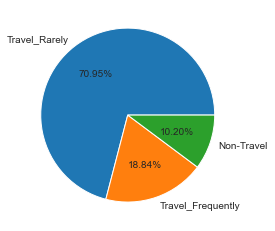

In [25]:
plt.pie(df['BusinessTravel'].value_counts().values,labels=df['BusinessTravel'].value_counts().index,autopct='%1.2f%%')

Rarely travel job are high in number, semms person are comnfortable after doing job from office after that they didnt want to go to the fields/ travel so they changes the JOB

### Gender effect vs Attrition

In [26]:
df['Gender'].value_counts()

Male      882
Female    588
Name: Gender, dtype: int64

In [27]:
df.groupby('Gender')['Attrition'].value_counts()

Gender  Attrition
Female  No           501
        Yes           87
Male    No           732
        Yes          150
Name: Attrition, dtype: int64

 More Male are leaving jobs more than Female

<AxesSubplot:xlabel='Age', ylabel='Attrition'>

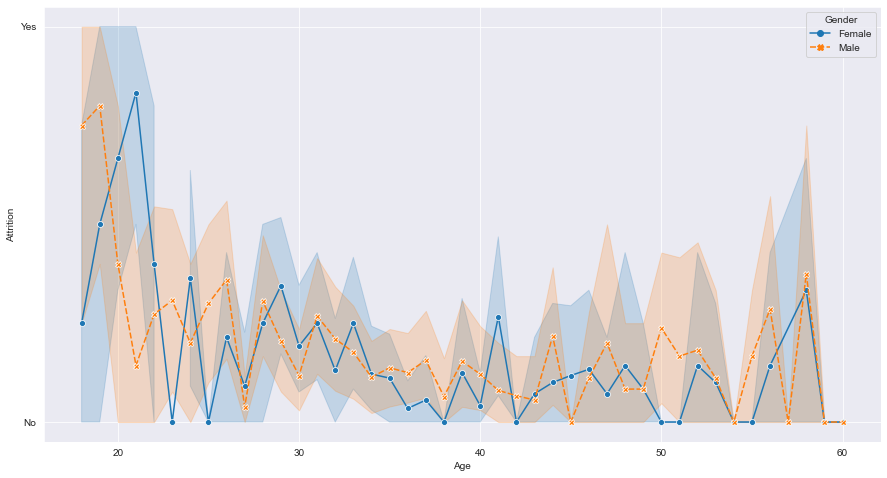

In [28]:
plt.figure(figsize=(15,8))
sns.lineplot(x='Age',y='Attrition',hue='Gender',style='Gender',markers=True,data=df)

In [29]:
df.groupby('Gender')['DailyRate'].mean()

Gender
Female    808.273810
Male      798.626984
Name: DailyRate, dtype: float64

Male are doing mpore Attrition

<AxesSubplot:xlabel='Gender', ylabel='DailyRate'>

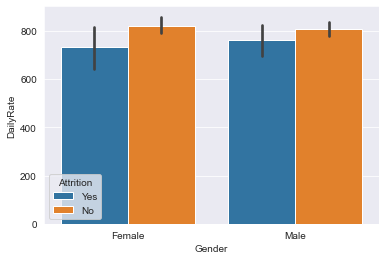

In [30]:
sns.barplot(y='DailyRate',x='Gender',hue='Attrition', data=df)

### DailyRate vs attrition (Daily Rate is salary level)

<AxesSubplot:xlabel='DailyRate', ylabel='Density'>

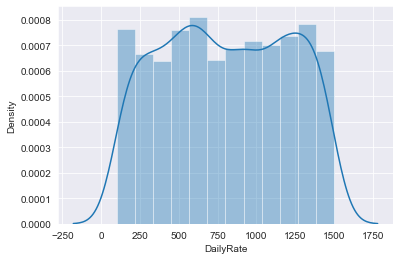

In [31]:
sns.distplot(df['DailyRate'])

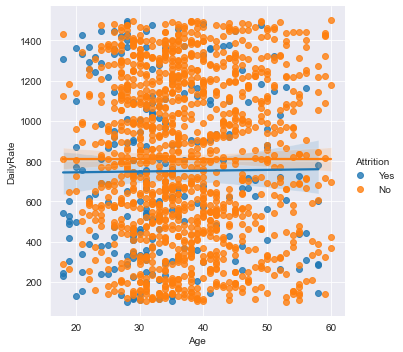

In [32]:
sns.lmplot(x = 'Age', y = 'DailyRate', hue = 'Attrition', data = df)

Attrition is  happening at lower dailyRate .

### Department vs Attrition

In [33]:
df['Department'].unique()

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

In [34]:
df.groupby('Department')['Attrition'].value_counts()

Department              Attrition
Human Resources         No            51
                        Yes           12
Research & Development  No           828
                        Yes          133
Sales                   No           354
                        Yes           92
Name: Attrition, dtype: int64

<AxesSubplot:xlabel='Department', ylabel='count'>

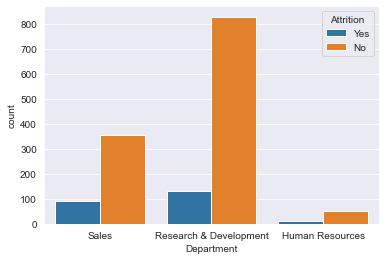

In [35]:
sns.countplot('Department',hue='Attrition',data=df)

department have not much effect on attrition

<AxesSubplot:xlabel='Department', ylabel='DailyRate'>

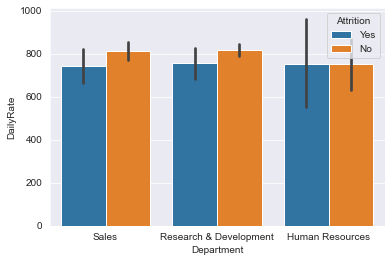

In [36]:
sns.barplot(x='Department',y='DailyRate',hue='Attrition', data=df)

([<matplotlib.patches.Wedge at 0x26308d21eb0>,
 [Text(-0.5108751650946098, 0.9741696801325502, 'Research & Development'),
  Text(0.37548555701288383, -1.0339296864268501, 'Sales'),
  Text(1.0900447132085396, -0.1476567750091844, 'Human Resources')],
 [Text(-0.27865918096069625, 0.5313652800723001, '65.37%'),
  Text(0.20481030382520934, -0.5639616471419181, '30.34%'),
  Text(0.5945698435682942, -0.08054005909591874, '4.29%')])

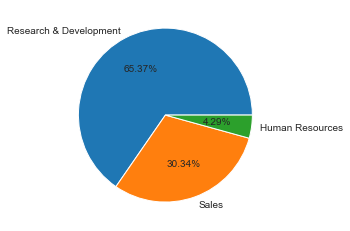

In [37]:
plt.pie(df['Department'].value_counts().values,labels=df['Department'].value_counts().index,autopct='%1.2f%%')

### DistanceFromHome vs Attrition

In [38]:
df['DistanceFromHome'].unique()

array([ 1,  8,  2,  3, 24, 23, 27, 16, 15, 26, 19, 21,  5, 11,  9,  7,  6,
       10,  4, 25, 12, 18, 29, 22, 14, 20, 28, 17, 13], dtype=int64)

<AxesSubplot:xlabel='Age', ylabel='DistanceFromHome'>

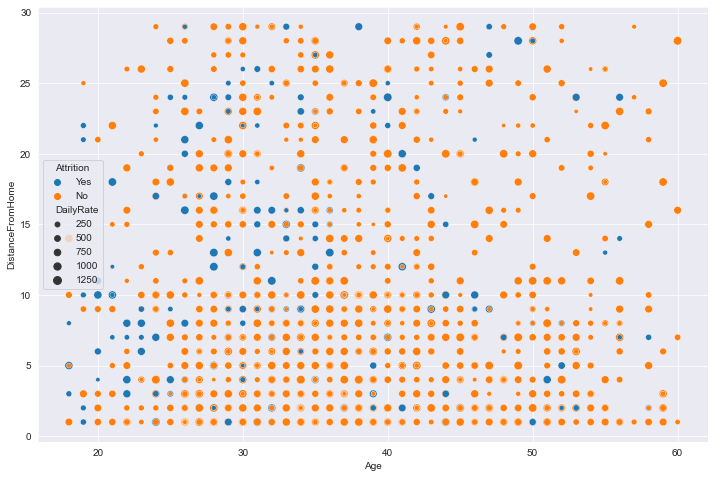

In [39]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Age',y='DistanceFromHome',hue='Attrition', size='DailyRate', data=df)

- From the graph, employees at early age and living far away from office are doing attrition

- As the Age increases, Attrition decreases

### Education vs Attrition

In [40]:
df['Education'].value_counts()

3    572
4    398
2    282
1    170
5     48
Name: Education, dtype: int64

In [41]:
df.groupby('Education')['Attrition'].value_counts()

Education  Attrition
1          No           139
           Yes           31
2          No           238
           Yes           44
3          No           473
           Yes           99
4          No           340
           Yes           58
5          No            43
           Yes            5
Name: Attrition, dtype: int64

<AxesSubplot:xlabel='Education', ylabel='count'>

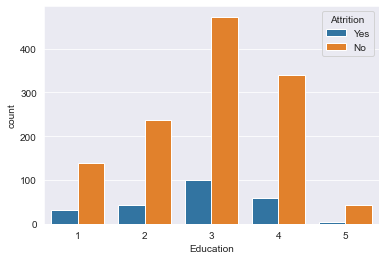

In [42]:
sns.countplot(x='Education',hue='Attrition', data=df)

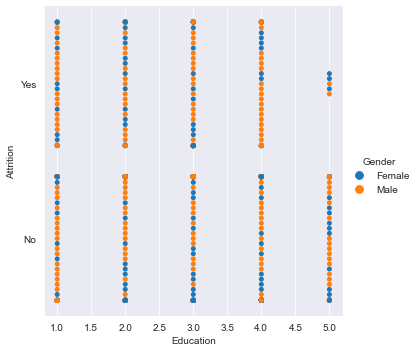

In [43]:
sns.catplot(x="Education", y="Attrition", hue="Gender", kind="swarm", data=df)

### EducationField vs Attrition

In [44]:
df['EducationField'].value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

In [45]:
df.groupby('Education')['EducationField'].value_counts()

Education  EducationField  
1          Life Sciences        67
           Medical              63
           Technical Degree     19
           Marketing            14
           Other                 5
           Human Resources       2
2          Life Sciences       116
           Medical              99
           Marketing            24
           Technical Degree     22
           Other                19
           Human Resources       2
3          Life Sciences       233
           Medical             183
           Marketing            59
           Technical Degree     57
           Other                24
           Human Resources      16
4          Life Sciences       173
           Medical             104
           Marketing            52
           Other                33
           Technical Degree     31
           Human Resources       5
5          Life Sciences        17
           Medical              15
           Marketing            10
           Technical Degree

<AxesSubplot:xlabel='EducationField', ylabel='count'>

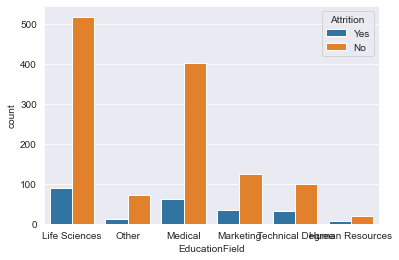

In [46]:
sns.countplot(df['EducationField'],hue='Attrition',data=df)

### EnvironmentSatisfaction vs Attrition

In [47]:
df['EnvironmentSatisfaction'].value_counts()

3    453
4    446
2    287
1    284
Name: EnvironmentSatisfaction, dtype: int64

<AxesSubplot:xlabel='EnvironmentSatisfaction', ylabel='count'>

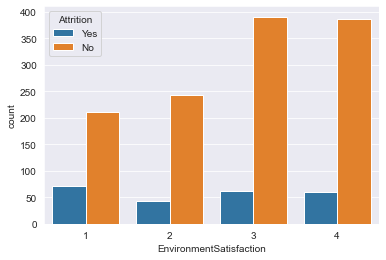

In [48]:
sns.countplot(df['EnvironmentSatisfaction'], hue='Attrition',data=df)

Less EnvironmentalSatifaction.,,  more Attrition

### HourlyRate vs Attrition

In [49]:
df['HourlyRate'].unique()

array([ 94,  61,  92,  56,  40,  79,  81,  67,  44,  84,  49,  31,  93,
        50,  51,  80,  96,  78,  45,  82,  53,  83,  58,  72,  48,  42,
        41,  86,  97,  75,  33,  37,  73,  98,  36,  47,  71,  30,  43,
        99,  59,  95,  57,  76,  87,  66,  55,  32,  52,  70,  62,  64,
        63,  60, 100,  46,  39,  77,  35,  91,  54,  34,  90,  65,  88,
        85,  89,  68,  69,  74,  38], dtype=int64)

<AxesSubplot:xlabel='HourlyRate', ylabel='Density'>

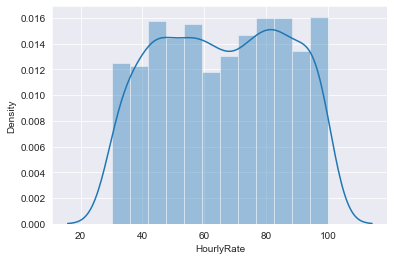

In [50]:
sns.distplot(df['HourlyRate'])

<AxesSubplot:xlabel='HourlyRate', ylabel='Attrition'>

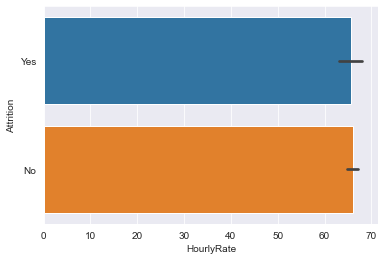

In [51]:
sns.barplot(df['HourlyRate'],df['Attrition'], data=df)

## JobInvolvement vs Attrition

In [52]:
df['JobInvolvement'].unique()

array([3, 2, 4, 1], dtype=int64)

In [53]:
df.groupby('JobInvolvement')['JobInvolvement'].value_counts()

JobInvolvement  JobInvolvement
1               1                  83
2               2                 375
3               3                 868
4               4                 144
Name: JobInvolvement, dtype: int64

<AxesSubplot:xlabel='JobInvolvement', ylabel='count'>

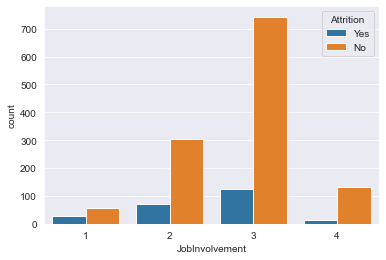

In [54]:
sns.countplot(df['JobInvolvement'],hue='Attrition',data=df)

 More involvement, less change for attrition

## JobLevel

In [55]:
df['JobLevel'].unique()

array([2, 1, 3, 4, 5], dtype=int64)

<AxesSubplot:xlabel='JobLevel', ylabel='count'>

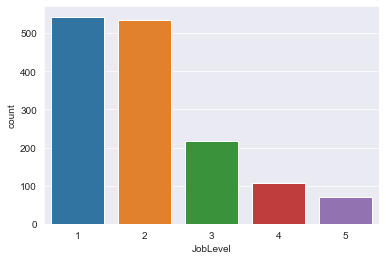

In [56]:
sns.countplot(df['JobLevel'])

Low level workiners are more.

<AxesSubplot:xlabel='JobLevel', ylabel='count'>

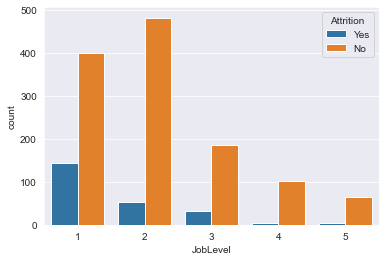

In [57]:
sns.countplot(df['JobLevel'], hue='Attrition', data=df)

low job level workers changes job very frequently

## JobRole vs MonthlyIncome

In [58]:
df['JobRole'].value_counts()

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

<AxesSubplot:xlabel='MonthlyIncome', ylabel='JobRole'>

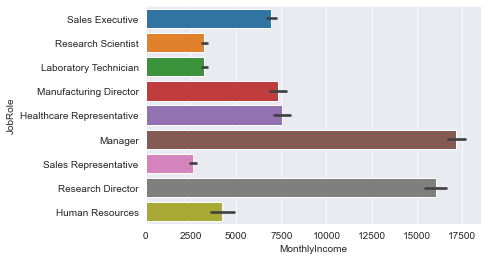

In [59]:
sns.barplot('MonthlyIncome','JobRole',data=df)

Managers and Research Directors are taking more salary

## JobSatisfaction vs Attrition

In [60]:
df['JobSatisfaction'].unique()

array([4, 2, 3, 1], dtype=int64)

<AxesSubplot:xlabel='JobSatisfaction', ylabel='count'>

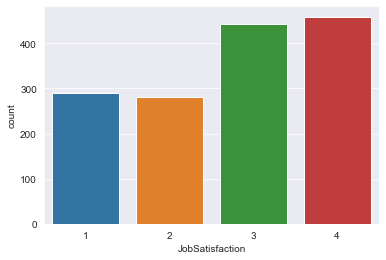

In [61]:
sns.countplot(df['JobSatisfaction'])

more people are satisfied

<AxesSubplot:xlabel='JobSatisfaction', ylabel='count'>

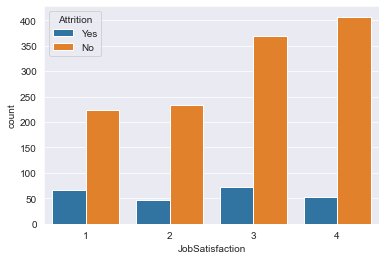

In [62]:
sns.countplot(df['JobSatisfaction'],hue='Attrition', data=df)

## MaritalStatus vs Attrition

In [63]:
df['MaritalStatus'].value_counts()

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64

<AxesSubplot:xlabel='MaritalStatus', ylabel='count'>

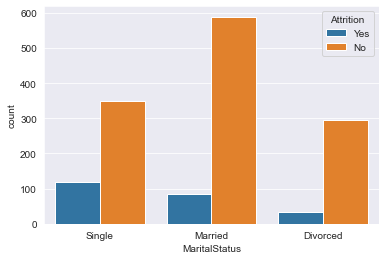

In [64]:
sns.countplot(df['MaritalStatus'], hue='Attrition',data=df)

Single person do more attrition, divorce do less

## MonthlyIncome vs attrition

In [65]:
df['MonthlyIncome'].unique()

array([5993, 5130, 2090, ..., 9991, 5390, 4404], dtype=int64)

<AxesSubplot:xlabel='MonthlyIncome', ylabel='Density'>

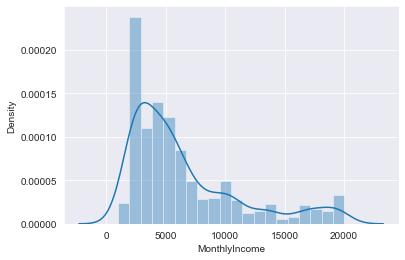

In [66]:
sns.distplot(df['MonthlyIncome'])

right skewed data

<AxesSubplot:xlabel='Age', ylabel='MonthlyIncome'>

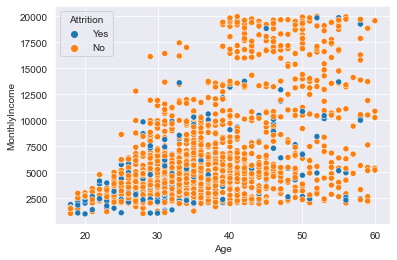

In [67]:
sns.scatterplot(x='Age', y='MonthlyIncome',hue='Attrition', data=df)

Less Age and Less Salary do more Attrition

## NumCompaniesWorked vs Attrition

<AxesSubplot:xlabel='NumCompaniesWorked', ylabel='MonthlyIncome'>

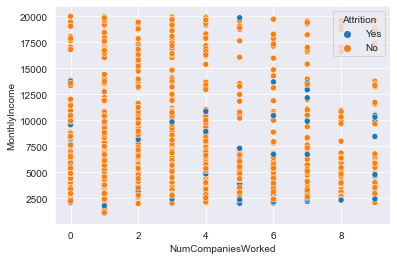

In [68]:
sns.scatterplot(x='NumCompaniesWorked', y='MonthlyIncome',hue='Attrition', data=df)

## Over18

In [69]:
df['Over18'].unique()

array(['Y'], dtype=object)

not relevent for prediction, we can drop this

In [70]:
df.drop('Over18',axis=1, inplace=True)

## OverTime

In [71]:
df['OverTime'].value_counts()

No     1054
Yes     416
Name: OverTime, dtype: int64

## PercentSalaryHike vs Attrition

In [72]:
df['PercentSalaryHike'].unique()

array([11, 23, 15, 12, 13, 20, 22, 21, 17, 14, 16, 18, 19, 24, 25],
      dtype=int64)

<AxesSubplot:xlabel='Attrition', ylabel='PercentSalaryHike'>

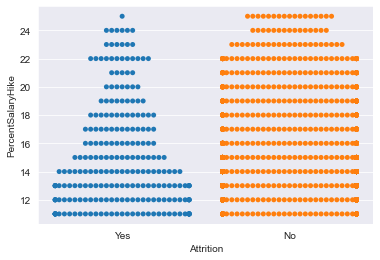

In [73]:
sns.swarmplot(data = df, x='Attrition', y='PercentSalaryHike')

As the percentage salary hike increases, job sttrition decreases

## PerformanceRating vs Attrition

In [74]:
df['PerformanceRating'].value_counts()

3    1244
4     226
Name: PerformanceRating, dtype: int64

<AxesSubplot:xlabel='PerformanceRating', ylabel='count'>

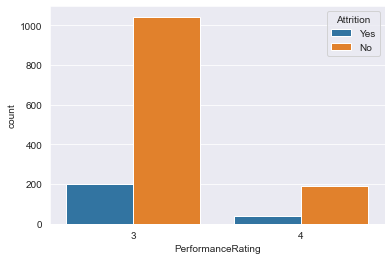

In [75]:
sns.countplot(df['PerformanceRating'],hue='Attrition', data=df)

Low performace Rating peoples quits more to change job

## RelationshipSatisfaction 

In [76]:
df.groupby('RelationshipSatisfaction')['Attrition'].value_counts()

RelationshipSatisfaction  Attrition
1                         No           219
                          Yes           57
2                         No           258
                          Yes           45
3                         No           388
                          Yes           71
4                         No           368
                          Yes           64
Name: Attrition, dtype: int64

## StockOptionLevel

<AxesSubplot:xlabel='StockOptionLevel', ylabel='count'>

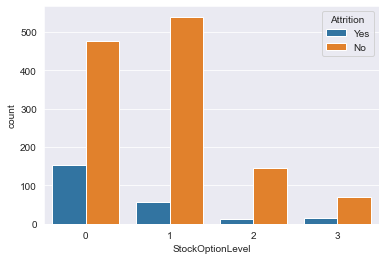

In [77]:
sns.countplot(df['StockOptionLevel'],hue='Attrition', data=df)

## TotalWorkingYears

<AxesSubplot:xlabel='MonthlyIncome', ylabel='TotalWorkingYears'>

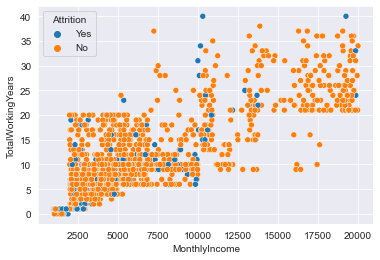

In [78]:
sns.scatterplot(x='MonthlyIncome',y='TotalWorkingYears', hue='Attrition', data=df)

Monthly income increases when totalworking years increases

## TrainingTimesLastYear

<AxesSubplot:xlabel='TrainingTimesLastYear', ylabel='count'>

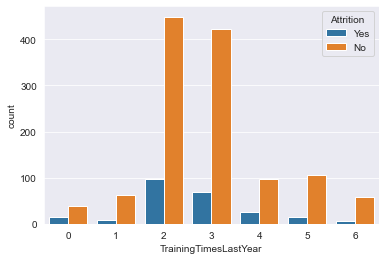

In [79]:
sns.countplot(df['TrainingTimesLastYear'],hue='Attrition', data=df)

## WorkLifeBalance

In [80]:
df.groupby('WorkLifeBalance')['Attrition'].value_counts()

WorkLifeBalance  Attrition
1                No            55
                 Yes           25
2                No           286
                 Yes           58
3                No           766
                 Yes          127
4                No           126
                 Yes           27
Name: Attrition, dtype: int64

## YearsAtCompany

<AxesSubplot:xlabel='Age', ylabel='YearsAtCompany'>

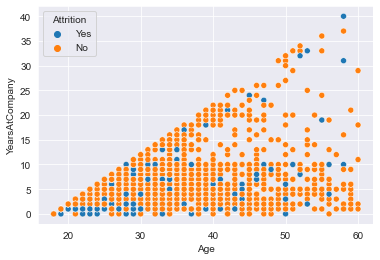

In [81]:
sns.scatterplot(x='Age',y='YearsAtCompany',hue='Attrition',data=df)

As age increases, Yeasratcompany increases

## Target Column

In [82]:
df['Attrition'].unique()

array(['Yes', 'No'], dtype=object)

In [83]:
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [84]:
df['Attrition']=np.where(df['Attrition']=='Yes',1,0)

### Separating Numerical And Categorical Columns

In [85]:
numerical_columns = df.select_dtypes(include='number').columns
categorical_columns = df.select_dtypes(include='object').columns

In [86]:
numerical_columns

Index(['Age', 'Attrition', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [87]:
categorical_columns

Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'OverTime'],
      dtype='object')

#### Distribution plot Seeing Distribution

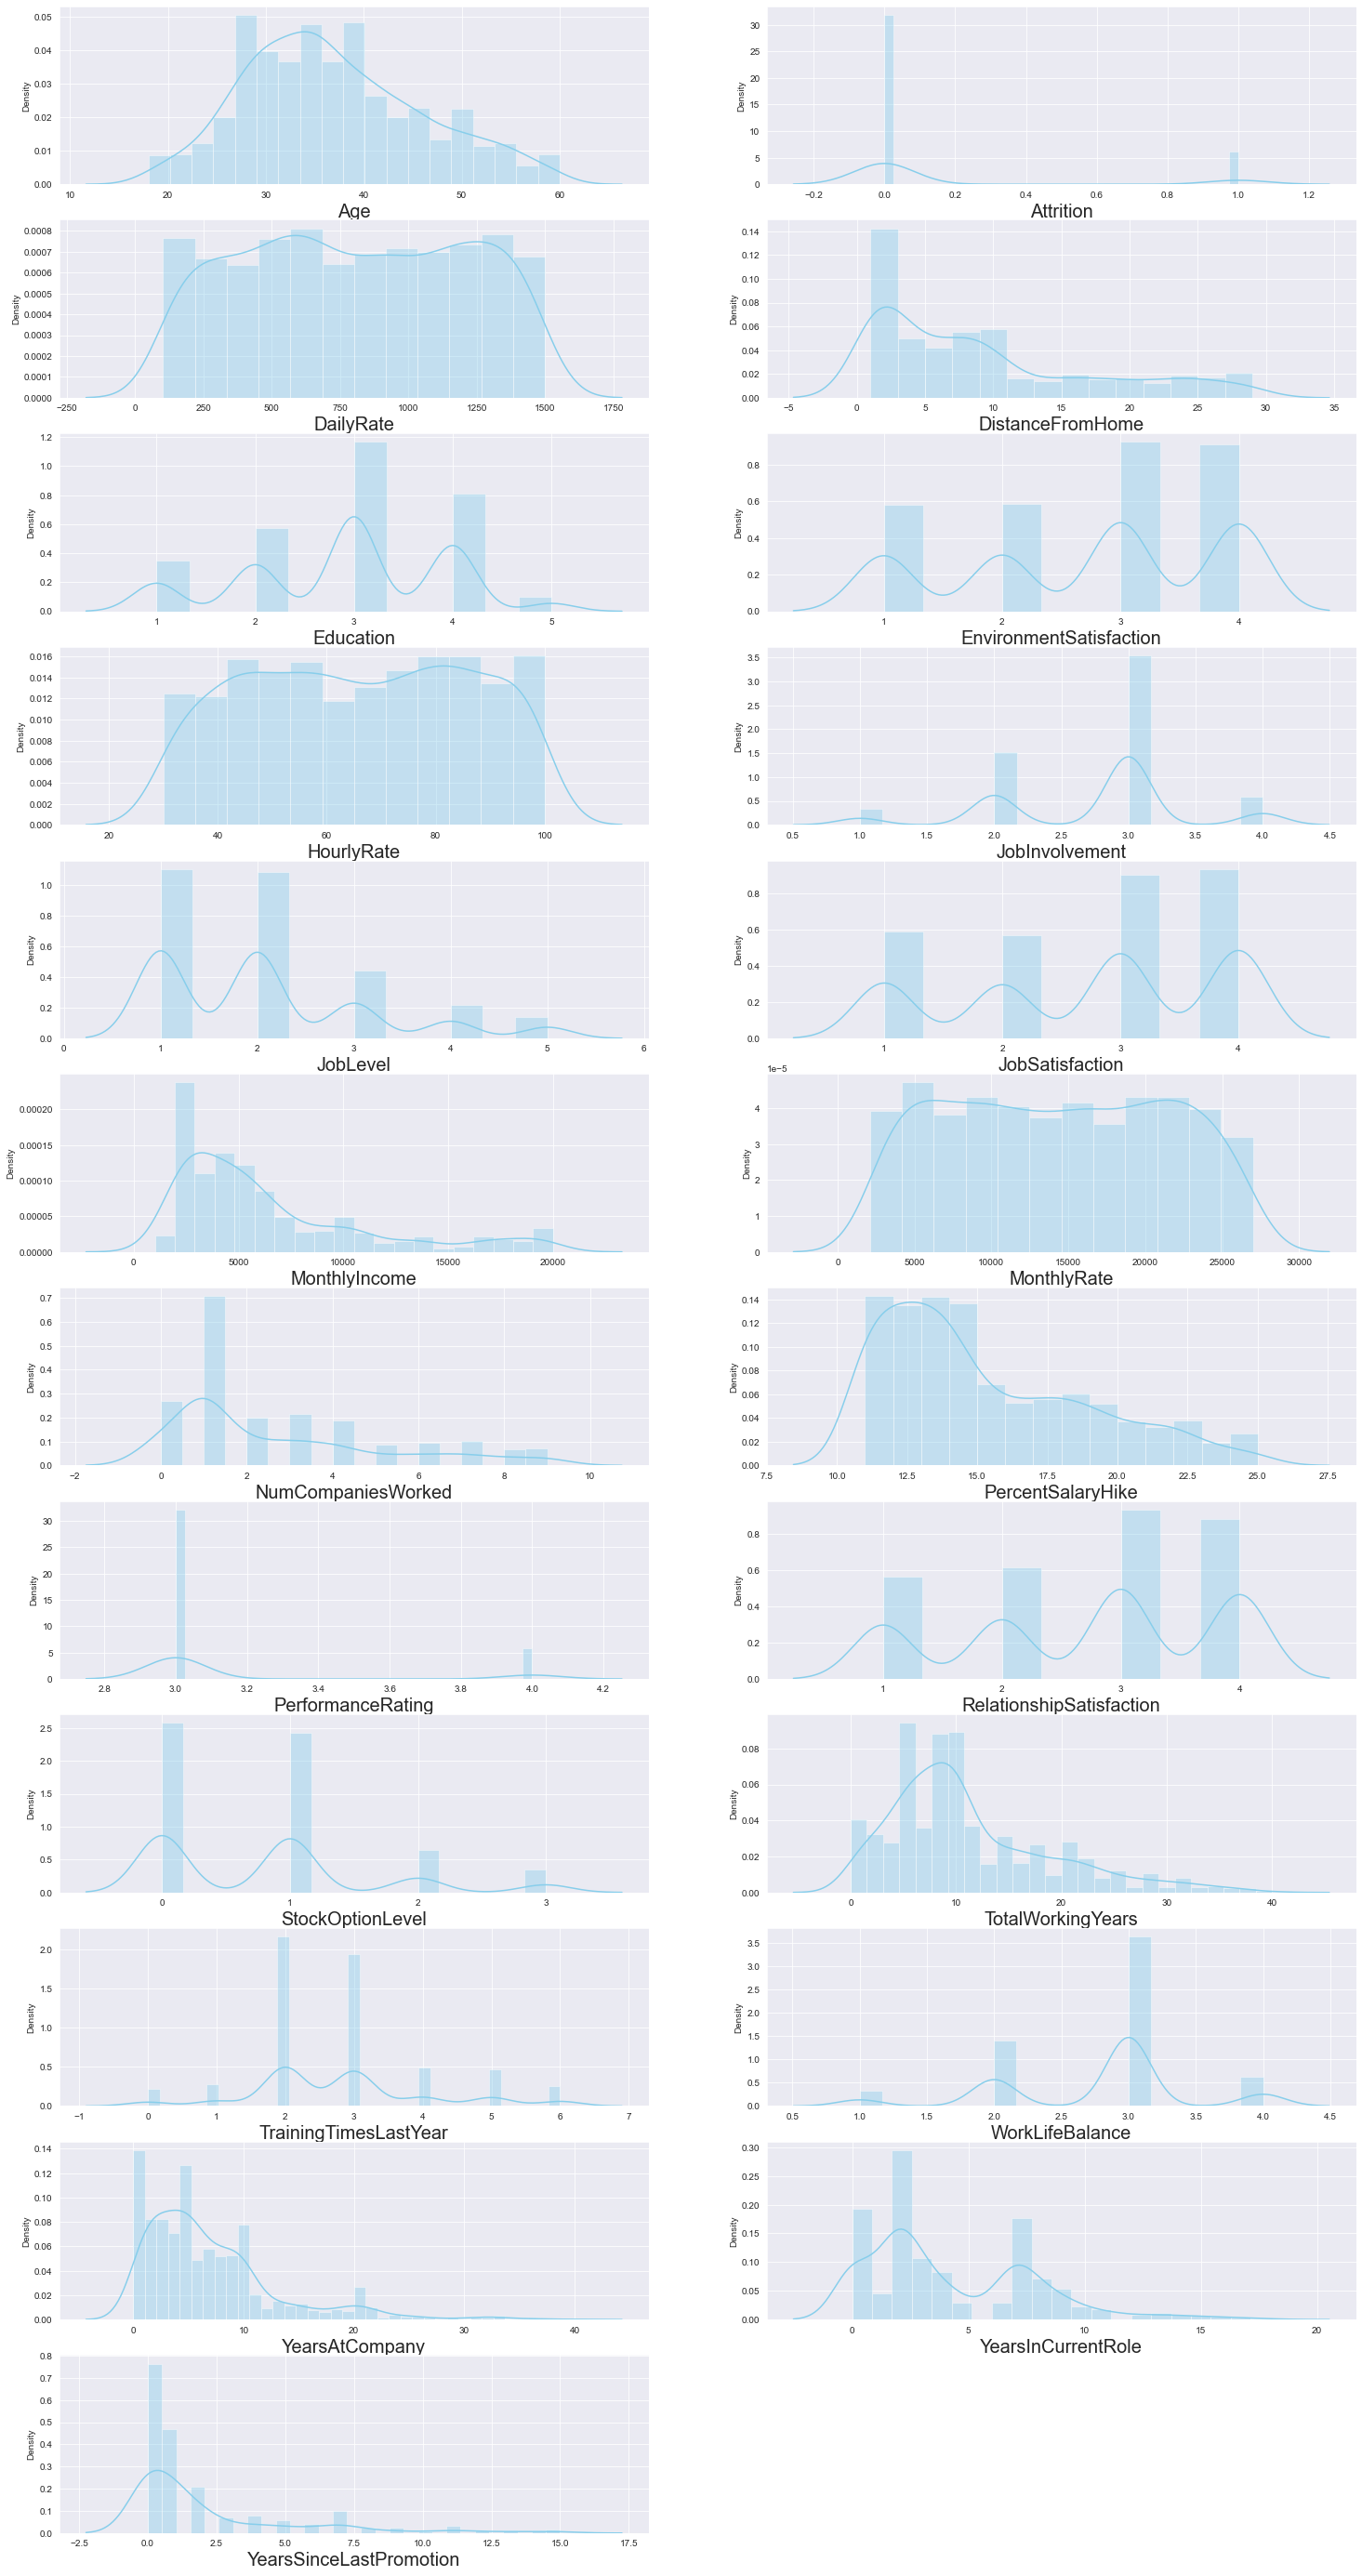

In [88]:
plt.figure(figsize = (25,50), facecolor = 'white')
plotnumber = 1

for column in numerical_columns:
    if plotnumber <=23:
        ax = plt.subplot(12,2,plotnumber)
        sns.distplot(df[column], color = 'skyblue')
        plt.xlabel(column,fontsize=20)

    plotnumber +=1
plt.show()

### BoxPlot for seeing Outliers

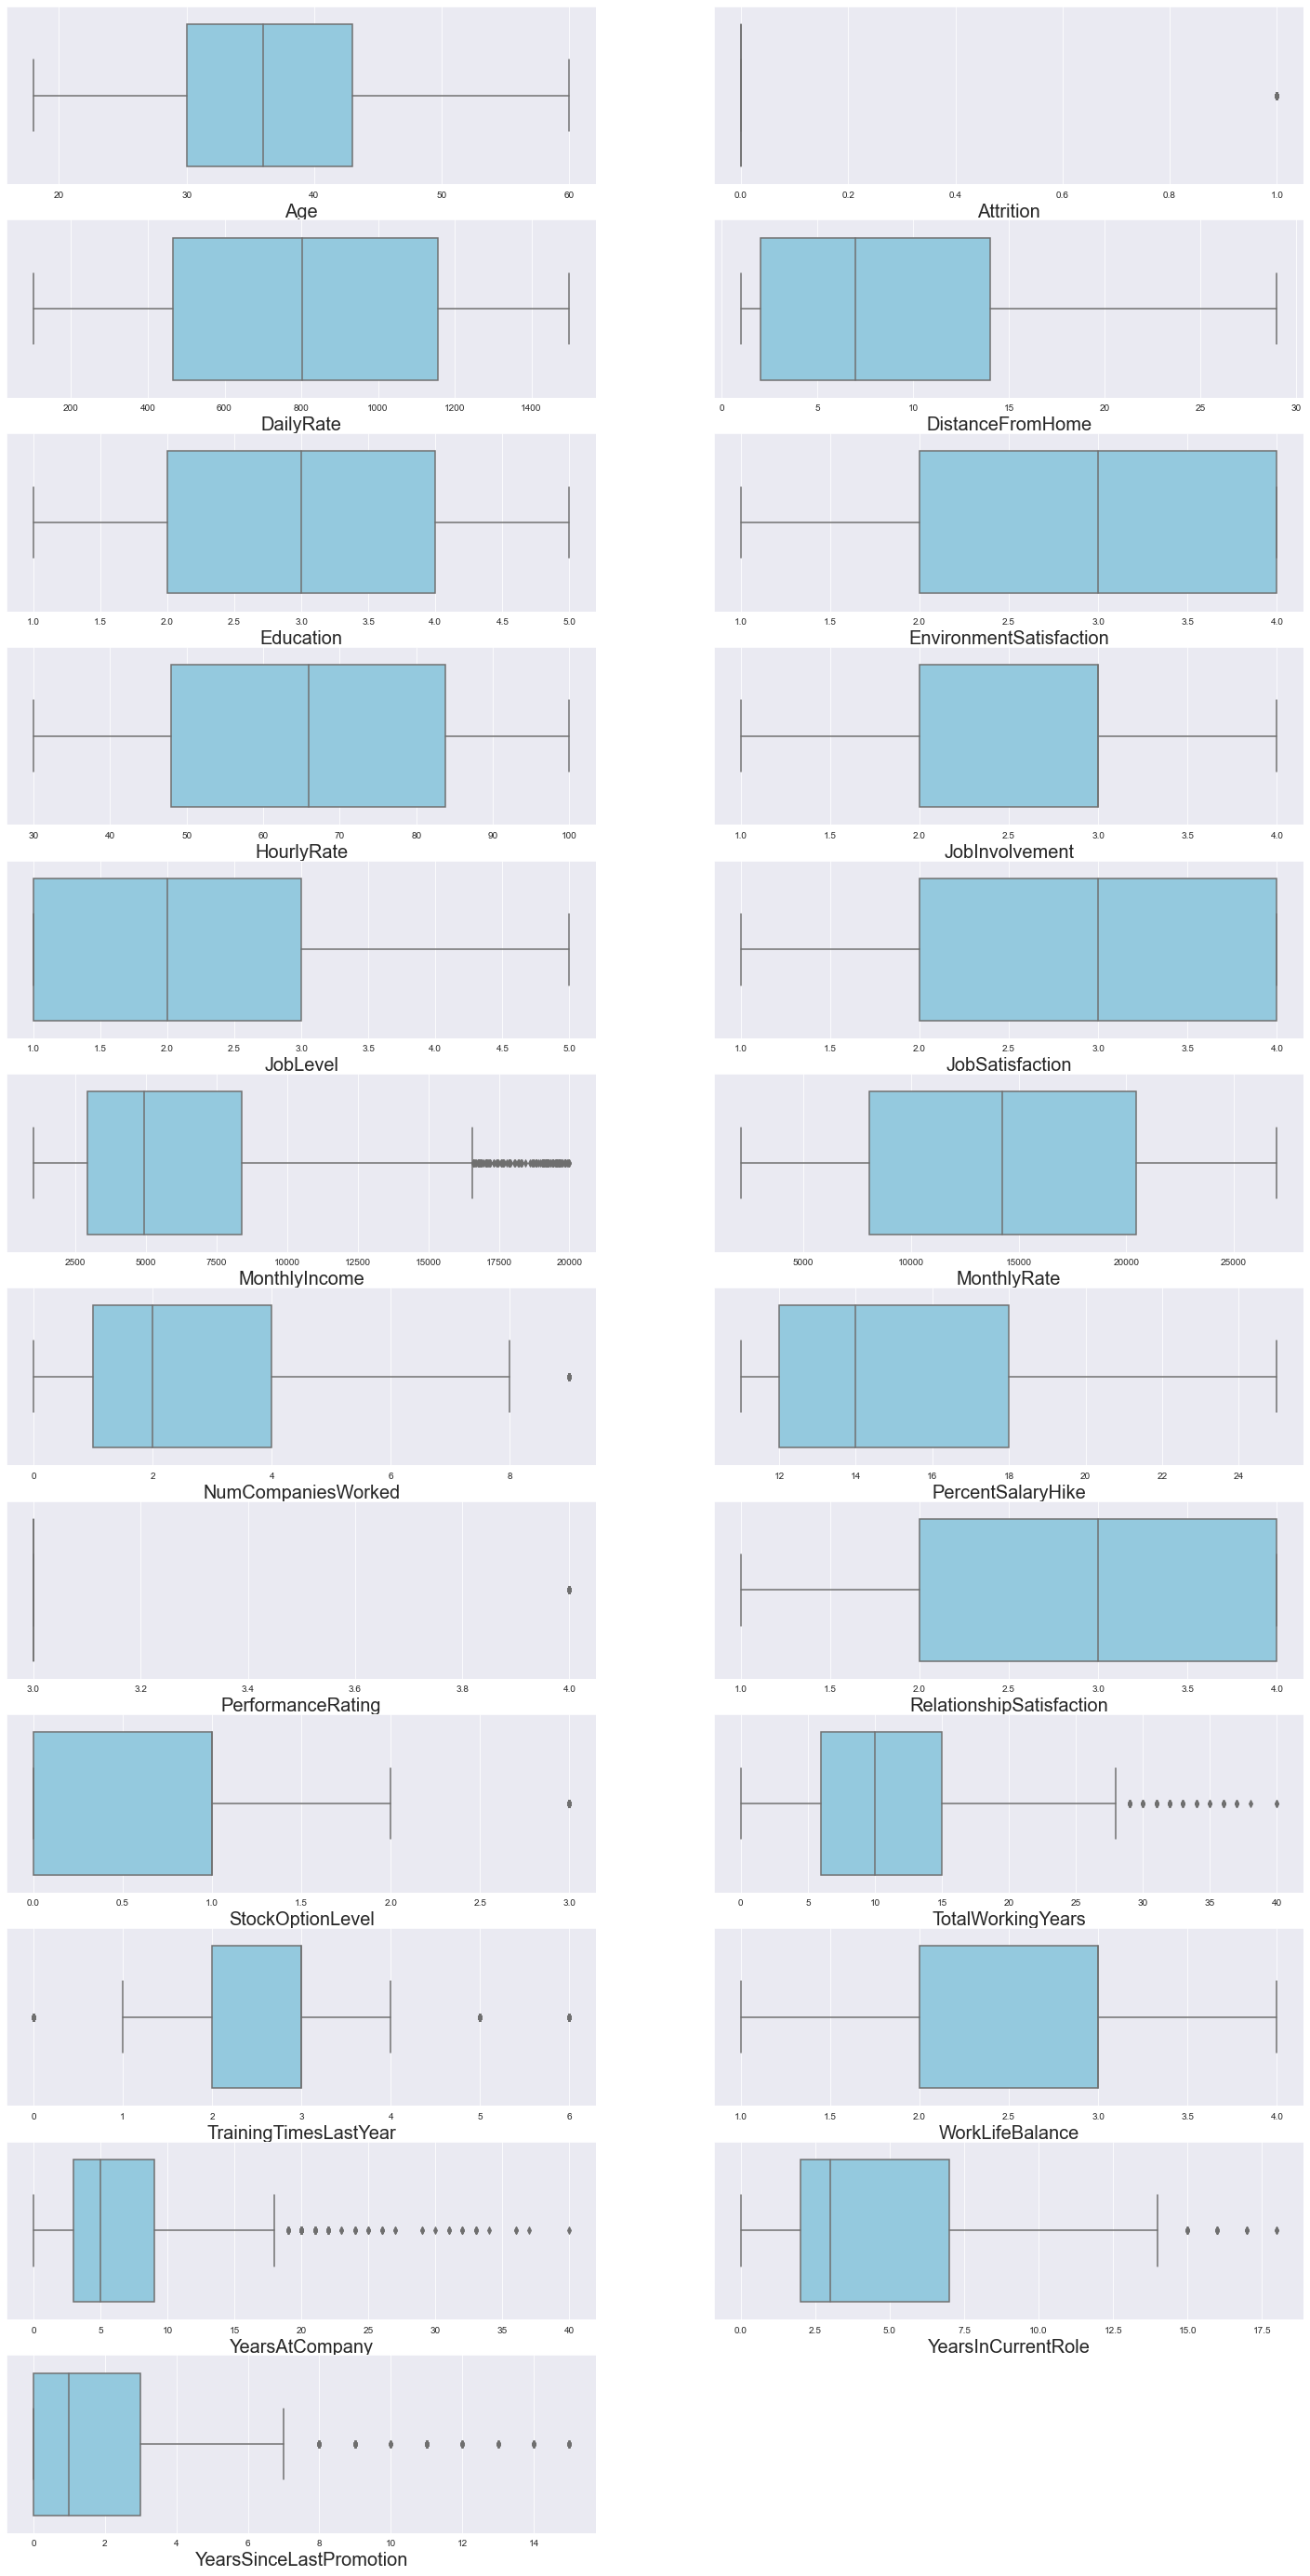

In [89]:
plt.figure(figsize = (25,50), facecolor = 'white')
plotnumber = 1

for column in numerical_columns:
    if plotnumber <=23:
        ax = plt.subplot(12,2,plotnumber)
        sns.boxplot(df[column], color = 'skyblue')
        plt.xlabel(column,fontsize=20)

    plotnumber +=1
plt.show()

seems some features have outliers, letas check if they are actually outliers or not
1. **'MonthlyIncome':**'Few high posts have rarely high income. It could be true.
2. **'"NumCompaniesWorked":**'If a person starte working at 18, possibly at low jobe profile he can change job every year.
3. **'"PerformanceRating":**' This is not outlier
4. **'"PercentSalaryHike":**'25% salary hike is resonable for few emoployees, definatley not an outlier
5. **'"TotalWorkingYears":**' yes it be person start working at 18 till 58 which completes 18 years
6. **'"StockOptionLevel" :**'Not an outlier
7. **'"TrainingTimesLastYear":**'Not an outlier
8. **'"YearsAtCompany":**'Not an outlier
9. **'"YearsInCurrentRole":**'This is not an outlier, very few peoples have 20 ye experience in current role
10. **'"YearsSinceLastPromotion" :**'  Categorical feature and definetly not an outlier
11. **'"YearsWithCurrManager":**'if yearsatcompany is more than 16, than yearswithcurrntmanager could be 16, not an outlier

We didn't see any much outliers in the dataset

### Pair plot

In [90]:
sns.pairplot(df)

### Heat Map

<AxesSubplot:>

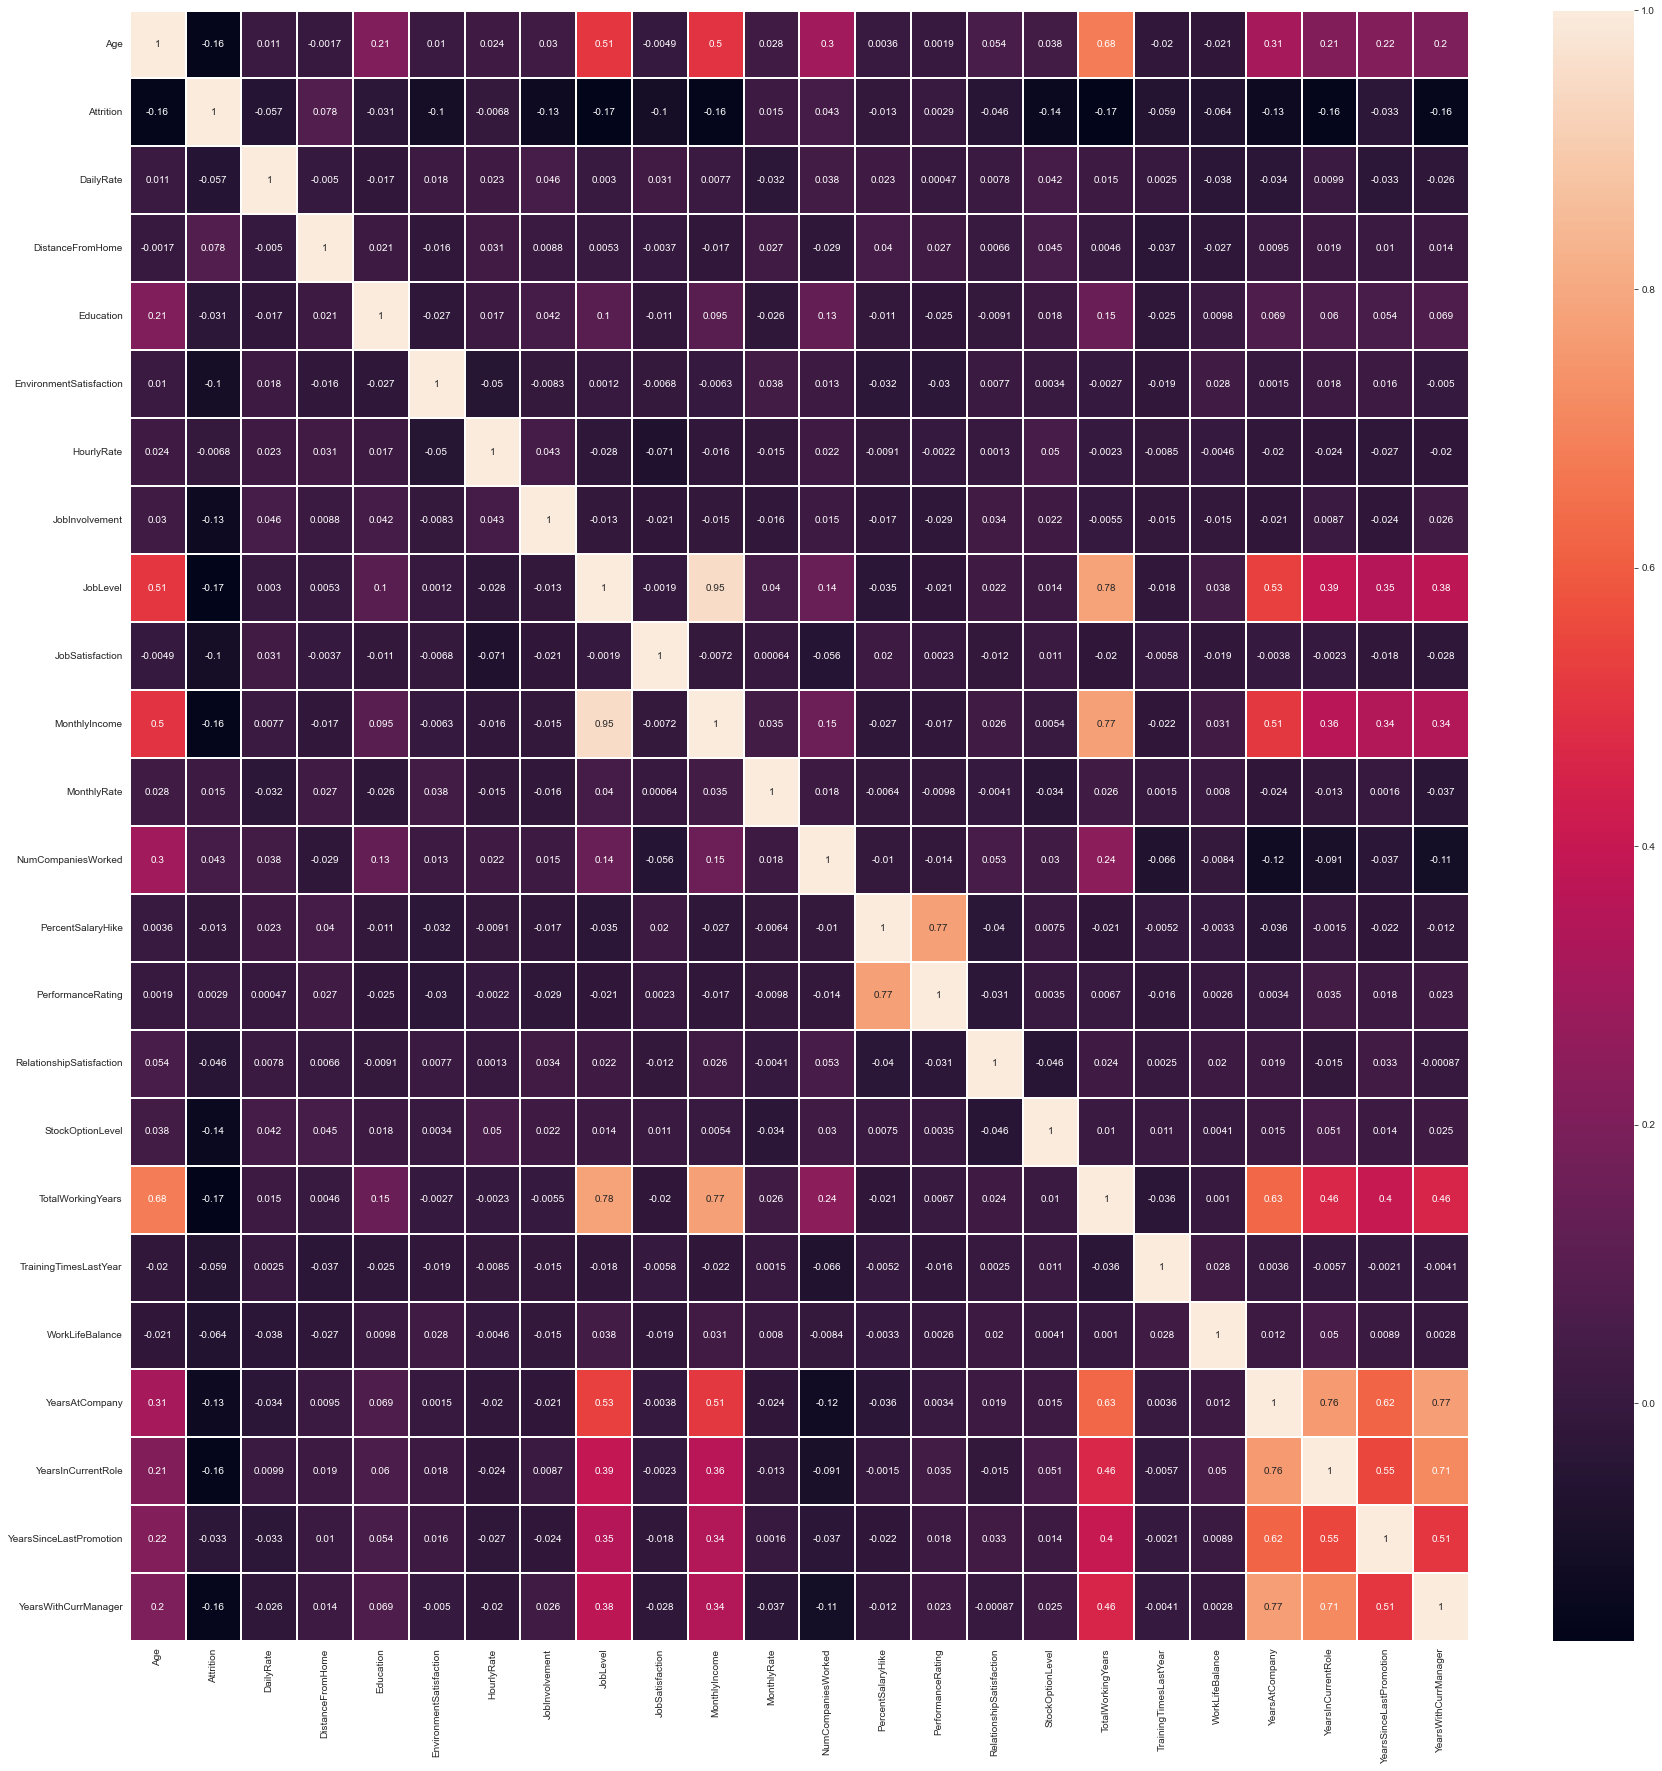

In [91]:
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(),annot=True, linecolor='white',linewidths=.25)

- Most of the features are low correlated with target variable and soime strongly correlated
- Monthly income and Job Level are highly correlated
- Totalworkingyears are highly correlated with Joblevel
- Totalworkingyears are highly corre;ated with MOnthly income
- Yearsatcompany  and YearsInCurrentRole are highly correlated

### Checking Correlation with Target Column

In [92]:
#correlation with target column
correlation_with_quality = df.corr()['Attrition'].abs().sort_values(ascending=False)
print(correlation_with_quality)

Attrition                   1.000000
TotalWorkingYears           0.171063
JobLevel                    0.169105
YearsInCurrentRole          0.160545
MonthlyIncome               0.159840
Age                         0.159205
YearsWithCurrManager        0.156199
StockOptionLevel            0.137145
YearsAtCompany              0.134392
JobInvolvement              0.130016
JobSatisfaction             0.103481
EnvironmentSatisfaction     0.103369
DistanceFromHome            0.077924
WorkLifeBalance             0.063939
TrainingTimesLastYear       0.059478
DailyRate                   0.056652
RelationshipSatisfaction    0.045872
NumCompaniesWorked          0.043494
YearsSinceLastPromotion     0.033019
Education                   0.031373
MonthlyRate                 0.015170
PercentSalaryHike           0.013478
HourlyRate                  0.006846
PerformanceRating           0.002889
Name: Attrition, dtype: float64


Here we can see that  **'PerformanceRating**' , **'HourlyRate**' is vary low correlated with target column so we will remove thsese column

In [93]:
df.drop(columns=['PerformanceRating' , 'HourlyRate'],axis=1, inplace=True)

In [94]:
#schecking correlation
df_corr = df.corr()
df_corr

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,0.010661,-0.001686,0.208034,0.010146,0.029820,0.509604,-0.004892,0.497855,...,0.003634,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
Attrition,-0.159205,1.000000,-0.056652,0.077924,-0.031373,-0.103369,-0.130016,-0.169105,-0.103481,-0.159840,...,-0.013478,-0.045872,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
DailyRate,0.010661,-0.056652,1.000000,-0.004985,-0.016806,0.018355,0.046135,0.002966,0.030571,0.007707,...,0.022704,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,0.077924,-0.004985,1.000000,0.021042,-0.016075,0.008783,0.005303,-0.003669,-0.017014,...,0.040235,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.031373,-0.016806,0.021042,1.000000,-0.027128,0.042438,0.101589,-0.011296,0.094961,...,-0.011111,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EnvironmentSatisfaction,0.010146,-0.103369,0.018355,-0.016075,-0.027128,1.000000,-0.008278,0.001212,-0.006784,-0.006259,...,-0.031701,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
JobInvolvement,0.029820,-0.130016,0.046135,0.008783,0.042438,-0.008278,1.000000,-0.012630,-0.021476,-0.015271,...,-0.017205,0.034297,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,-0.169105,0.002966,0.005303,0.101589,0.001212,-0.012630,1.000000,-0.001944,0.950300,...,-0.034730,0.021642,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281
JobSatisfaction,-0.004892,-0.103481,0.030571,-0.003669,-0.011296,-0.006784,-0.021476,-0.001944,1.000000,-0.007157,...,0.020002,-0.012454,0.010690,-0.020185,-0.005779,-0.019459,-0.003803,-0.002305,-0.018214,-0.027656
MonthlyIncome,0.497855,-0.159840,0.007707,-0.017014,0.094961,-0.006259,-0.015271,0.950300,-0.007157,1.000000,...,-0.027269,0.025873,0.005408,0.772893,-0.021736,0.030683,0.514285,0.363818,0.344978,0.344079


### We are writing this function to see those columns which are highly correlated with each other

In [95]:
correlation_threshold = 0.8
mask = df_corr.abs() >= correlation_threshold
features_to_drop = set()
for i in range(len(df_corr.columns)):
    for j in range(i+1, len(df_corr.columns)):
        if mask.iloc[i, j]:
            colname_i = df_corr.columns[i]
            colname_j = df_corr.columns[j]
            if colname_i not in features_to_drop:
                features_to_drop.add(colname_j)

In [96]:
features_to_drop

{'MonthlyIncome'}

In [97]:
df.drop(columns=['MonthlyIncome'],axis=1, inplace=True)

### VIF

In [98]:
num=df.select_dtypes(np.number)

In [99]:
num.drop('Attrition',axis=1, inplace=True)

In [100]:
num.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [101]:

sc=StandardScaler()
standard=sc.fit_transform(num)

In [102]:
standard=pd.DataFrame(standard, columns=num.columns)

In [103]:
VIF= pd.DataFrame()
VIF['features']= standard.columns
VIF['vif']=[variance_inflation_factor(standard.values,i) for i in range(len(standard.columns))]

In [104]:
VIF

,features,vif
0,Age,2.037714
1,DailyRate,1.016883
2,DistanceFromHome,1.009272
3,Education,1.058291
4,EnvironmentSatisfaction,1.006980
5,JobInvolvement,1.014382
6,JobLevel,2.627306
7,JobSatisfaction,1.008788
8,MonthlyRate,1.012015
9,NumCompaniesWorked,1.257646


Multicolinearity is in controll

In [105]:
df.head(2)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,11,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,23,4,1,10,3,3,10,7,1,7


### Splitting into Feature and Target column

In [106]:
X= df.drop('Attrition', axis=1)
Y=df['Attrition']

## Handle categorical features

In [107]:
X=pd.get_dummies(X,drop_first=True)

In [108]:
X.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyRate,NumCompaniesWorked,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1102,1,2,2,3,2,4,19479,8,...,0,0,0,0,0,1,0,0,1,1
1,49,279,8,1,3,2,2,2,24907,1,...,0,0,0,0,1,0,0,1,0,0
2,37,1373,2,2,4,2,1,3,2396,6,...,1,0,0,0,0,0,0,0,1,1
3,33,1392,3,4,4,3,1,3,23159,1,...,0,0,0,0,1,0,0,1,0,1
4,27,591,2,1,1,3,1,2,16632,9,...,1,0,0,0,0,0,0,1,0,0


### removing Skewness

In [109]:
X.skew()

Age                                  0.413286
DailyRate                           -0.003519
DistanceFromHome                     0.958118
Education                           -0.289681
EnvironmentSatisfaction             -0.321654
JobInvolvement                      -0.498419
JobLevel                             1.025401
JobSatisfaction                     -0.329672
MonthlyRate                          0.018578
NumCompaniesWorked                   1.026471
PercentSalaryHike                    0.821128
RelationshipSatisfaction            -0.302828
StockOptionLevel                     0.968980
TotalWorkingYears                    1.117172
TrainingTimesLastYear                0.553124
WorkLifeBalance                     -0.552480
YearsAtCompany                       1.764529
YearsInCurrentRole                   0.917363
YearsSinceLastPromotion              1.984290
YearsWithCurrManager                 0.833451
BusinessTravel_Travel_Frequently     1.595067
BusinessTravel_Travel_Rarely      

#### Transformed by Power Transformer

In [110]:
transformed=power_transform(X)

In [111]:
pd.DataFrame(transformed).skew()

0    -0.007603
1    -0.196160
2    -0.007468
3    -0.099881
4    -0.205395
5    -0.020365
6     0.103624
7    -0.212815
8    -0.184087
9     0.014814
10    0.116250
11   -0.193634
12    0.087019
13   -0.010653
14    0.058058
15   -0.012286
16   -0.008683
17   -0.060849
18    0.212129
19   -0.067565
20    1.595067
21   -0.923992
22   -0.646936
23    0.856158
24    0.356919
25    2.525783
26    0.794118
27    3.875119
28    2.872604
29   -0.408665
30    5.035637
31    1.701604
32    3.392611
33    2.694844
34    3.932443
35    1.512214
36    1.340834
37    3.847192
38    0.169484
39    0.773874
40    0.964489
dtype: float64

## Standardization

In [112]:
sc=StandardScaler()

In [113]:
X=sc.fit_transform(transformed)

### Data Balancing

In [114]:
sm=SMOTE()

In [115]:
x,y=sm.fit_resample(X,Y)

In [116]:
x.shape , y.shape

((2466, 41), (2466,))

## Model Training

### Find best Randomstate


In [117]:
maxaccu=0
maxRS=0

for i in range(0,200):
    x_train,x_test,y_train,y_test= train_test_split(x,y,random_state=i,test_size=.20)
    LR= LogisticRegression()
    LR.fit(x_train,y_train)
    pred= LR.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxaccu:
        maxaccu=acc
        maxRS=i
print("Best accuracy is ",maxaccu,"on Random State =",maxRS)

Best accuracy is  0.840080971659919 on Random State = 124


In [118]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=.20,random_state=maxRS)

#### Defining All Regression Models

In [119]:
LR_model= LogisticRegression()
RD_model= RidgeClassifier()
DT_model= DecisionTreeClassifier()
SV_model= SVC()
KNR_model= KNeighborsClassifier()
RFR_model= RandomForestClassifier()
XGB_model= XGBClassifier()
SGH_model= SGDClassifier()
Bag_model=BaggingClassifier()
ADA_model=AdaBoostClassifier()
GB_model= GradientBoostingClassifier()

model=[LR_model,RD_model,DT_model,SV_model,KNR_model,RFR_model,XGB_model,SGH_model,Bag_model,ADA_model,GB_model ]

In [120]:
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    pred= m.predict(x_test)
    print('Accuracy_Score of ',m, 'is', accuracy_score(y_test,pred)*100)
    print('Confusion Matrix of ',m,' is \n', confusion_matrix(y_test,pred) )
    print(classification_report(y_test,pred))
    print('*'*30)

Accuracy_Score of  LogisticRegression() is 84.0080971659919
Confusion Matrix of  LogisticRegression()  is 
 [[197  47]
 [ 32 218]]
              precision    recall  f1-score   support

           0       0.86      0.81      0.83       244
           1       0.82      0.87      0.85       250

    accuracy                           0.84       494
   macro avg       0.84      0.84      0.84       494
weighted avg       0.84      0.84      0.84       494

******************************
Accuracy_Score of  RidgeClassifier() is 84.81781376518218
Confusion Matrix of  RidgeClassifier()  is 
 [[197  47]
 [ 28 222]]
              precision    recall  f1-score   support

           0       0.88      0.81      0.84       244
           1       0.83      0.89      0.86       250

    accuracy                           0.85       494
   macro avg       0.85      0.85      0.85       494
weighted avg       0.85      0.85      0.85       494

******************************
Accuracy_Score of  Decision

### CrossValidation

In [121]:
for i in model:
    print('Accuracy_Score of ',i, 'is', accuracy_score(y_test,i.predict(x_test))*100)
    print("cross Validation accuracy score of ",i ," is ",cross_val_score(i,x,y,cv=5, scoring='accuracy').mean()*100)
    print('*'*50)

Accuracy_Score of  LogisticRegression() is 84.0080971659919
cross Validation accuracy score of  LogisticRegression()  is  80.53559550303439
**************************************************
Accuracy_Score of  RidgeClassifier() is 84.81781376518218
cross Validation accuracy score of  RidgeClassifier()  is  80.04935493672549
**************************************************
Accuracy_Score of  DecisionTreeClassifier() is 82.5910931174089
cross Validation accuracy score of  DecisionTreeClassifier()  is  86.13709339662152
**************************************************
Accuracy_Score of  SVC() is 93.31983805668015
cross Validation accuracy score of  SVC()  is  93.02584359165976
**************************************************
Accuracy_Score of  KNeighborsClassifier() is 80.76923076923077
cross Validation accuracy score of  KNeighborsClassifier()  is  80.98192508889636
**************************************************
Accuracy_Score of  RandomForestClassifier() is 95.54655870445345
c

- Random FOrest gave best accuracy score and minimum difference for generalise model
- Accuracy_Score of  RandomForestClassifier() is **96%**
- cross Validation accuracy score of  RandomForestClassifier()  is  **95%**

### Hyperparameter tuning on RandomForest

In [122]:
n_estimator= [200,600,1000] 
max_features= ['auto','sqrt']  
max_depth=[10,118,282]  
min_samples_split= [2,3] 
min_samples_leaf= [1,4,7] 

param_grid= {'n_estimators': n_estimator,
             'max_features':max_features,
             'max_depth':max_depth,
             'min_samples_split':min_samples_split,
             'min_samples_leaf':min_samples_leaf,
             }
param_grid

{'n_estimators': [200, 600, 1000],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [10, 118, 282],
 'min_samples_split': [2, 3],
 'min_samples_leaf': [1, 4, 7]}

In [123]:
grid_search=GridSearchCV(estimator=RFR_model,param_grid=param_grid,cv=3,n_jobs=-1,verbose=1)
grid_search.fit(x_train,y_train)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 118, 282],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 4, 7],
                         'min_samples_split': [2, 3],
                         'n_estimators': [200, 600, 1000]},
             verbose=1)

In [124]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=118, max_features='sqrt', n_estimators=600)

In [125]:
grid_search.best_params_


{'max_depth': 118,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 600}

In [127]:
GCV_pred=grid_search.best_estimator_.predict(x_test)
accuracy_score(y_test,GCV_pred)

0.9534412955465587

### RUC AOC Curve/Plot

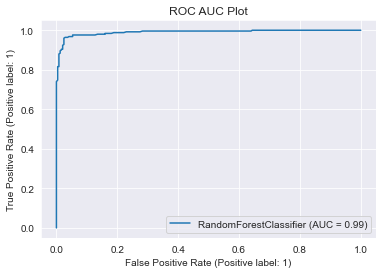

In [130]:
plot_roc_curve(grid_search.best_estimator_,x_test,y_test)
plt.title('ROC AUC Plot')
plt.show()

### Saving the Model

In [134]:

joblib.dump(grid_search.best_estimator_,"HR_Analytics.pkl")

['HR_Analytics.pkl']

# PROJECT COMPLETED